- Make set of dots on a plane with several jellieses.
- Apply to this dataset agglomerative algorithm until unioning into 1 cluster.
- Make table and plot of silhouette metric changing.
- Visualize partition that corresponds to best metric value.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

plt.style.use('seaborn')

# Importing data 

We will try to find clusters in mall customers dataset.

In [2]:
data = pd.read_csv('../data/mall_customers.csv', index_col='CustomerID')
display(data)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


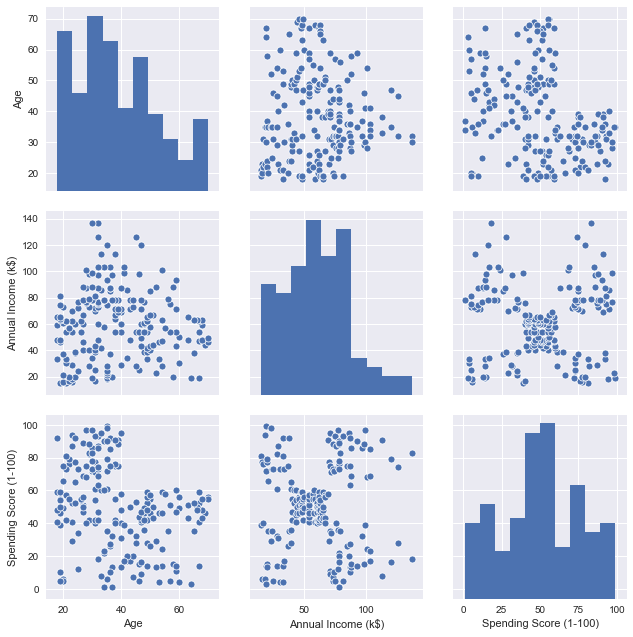

In [3]:
sns.pairplot(data, height=3)
plt.show()

We see some kind of clusters in dependency of spending score with income.

# Clustering

In [4]:
# Selecting last 2 columns.
X = np.array(data.iloc[:, 2:])

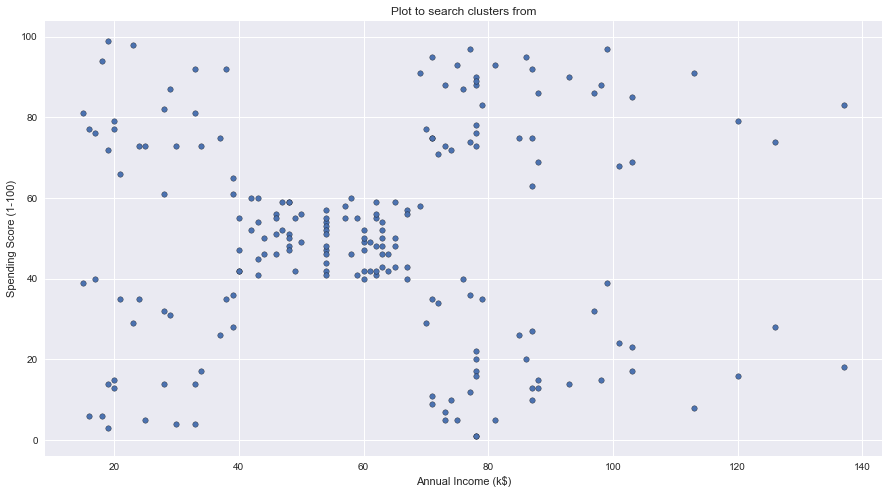

In [5]:
# Building plot of what we are clustering.
plt.figure(figsize=(15, 8))

plt.scatter(X[:, 0], X[:, 1], s=30, edgecolor='k')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Plot to search clusters from')

plt.show()

## Finding best number of clusters 

In [6]:
# Range of number of clusters
n_clusters_range = list(range(2, len(X[:, 0])))

In [7]:
silhouette_scores = []

# For every number of clusters counting silhouette score.
for n_clusters in n_clusters_range:    
    clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
    cluster_labels = clustering.labels_
    silhouette_scores.append(silhouette_score(X, cluster_labels))

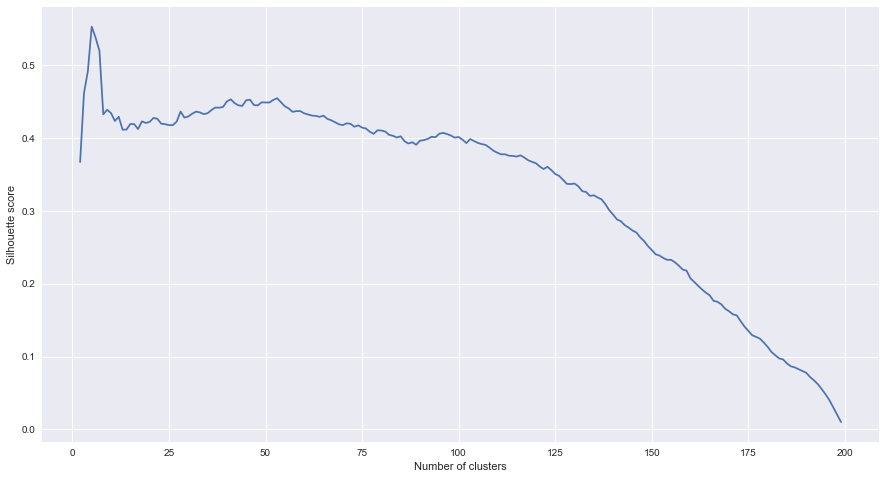

In [8]:
# Building silhouette score plot.
plt.figure(figsize=(15, 8))

plt.plot(n_clusters_range, silhouette_scores)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [9]:
# Number of slusters where silhouette score maximum.
n_clusters_opt = n_clusters_range[np.argmax(silhouette_scores)]

## Building best clustering plot 

In [10]:
# Calculating clusters distribution.
clustering = AgglomerativeClustering(n_clusters=n_clusters_opt).fit(X)
cluster_labels = clustering.labels_

# Calculating silhouette metric.
silhouette_best = silhouette_score(X, cluster_labels)

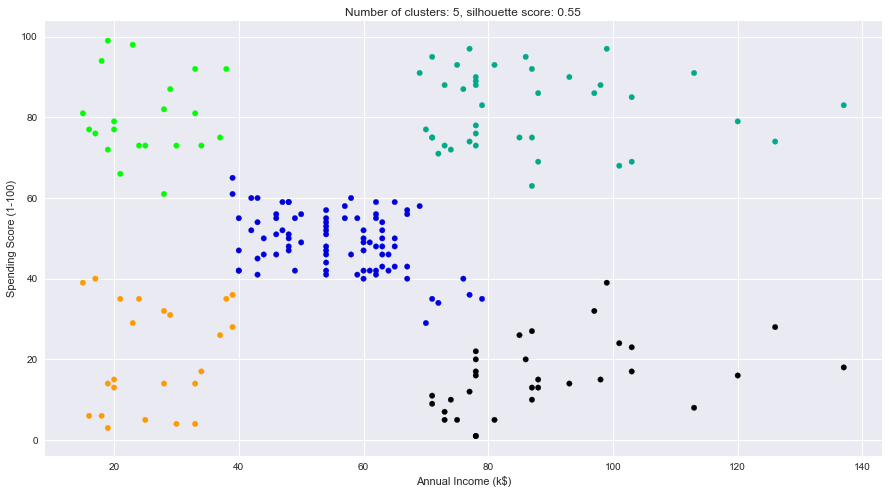

In [11]:
# Building plot.
plt.figure(figsize=(15, 8))

colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters_opt)
plt.scatter(X[:, 0], X[:, 1], s=30, c=colors)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Number of clusters: {}, silhouette score: {:.2f}'.format(n_clusters_opt, silhouette_best))

plt.show()